### Social Media Sentiment Analysis

### Importing Libaries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Reading file

In [5]:
df=pd.read_excel("Social_Media_Sentiment_Analysis.xlsx")
df

,PostID,UserName,PostDate,Platform,Content,Likes,Shares,Comments,SentimentScore,SentimentLabel,Topic,Language
0,1,User52,2023-01-01 00:00:00,Facebook,It's okay.,955,383,61,-0.41,Neutral,Health,English
1,2,User93,2023-01-01 01:00:00,Facebook,Disappointed.,305,491,205,0.87,Neutral,Finance,French
2,3,User15,2023-01-01 02:00:00,Twitter,It's okay.,208,63,100,0.25,Positive,Food,English
3,4,User72,2023-01-01 03:00:00,Twitter,Loved it!,466,306,118,0.59,Positive,Finance,German
4,5,User61,2023-01-01 04:00:00,Twitter,Not worth the price.,931,75,178,-0.99,Positive,Health,English
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,User16,2024-02-21 11:00:00,Instagram,Great product!,209,6,50,-0.94,Positive,Tech,French
9996,9997,User17,2024-02-21 12:00:00,Twitter,Amazing experience!,524,20,227,0.31,Positive,Finance,English
9997,9998,User80,2024-02-21 13:00:00,Facebook,It's okay.,675,476,5,0.89,Neutral,Travel,German
9998,9999,User19,2024-02-21 14:00:00,Twitter,Not worth the price.,999,36,272,-0.98,Negative,Tech,Spanish


### Checking For Null values And remove if any

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PostID          10000 non-null  int64  
 1   UserName        10000 non-null  object 
 2   PostDate        10000 non-null  object 
 3   Platform        10000 non-null  object 
 4   Content         10000 non-null  object 
 5   Likes           10000 non-null  int64  
 6   Shares          10000 non-null  int64  
 7   Comments        10000 non-null  int64  
 8   SentimentScore  10000 non-null  float64
 9   SentimentLabel  10000 non-null  object 
 10  Topic           10000 non-null  object 
 11  Language        10000 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 937.6+ KB


In [8]:
df.drop(['PostID'],axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UserName        10000 non-null  object 
 1   PostDate        10000 non-null  object 
 2   Platform        10000 non-null  object 
 3   Content         10000 non-null  object 
 4   Likes           10000 non-null  int64  
 5   Shares          10000 non-null  int64  
 6   Comments        10000 non-null  int64  
 7   SentimentScore  10000 non-null  float64
 8   SentimentLabel  10000 non-null  object 
 9   Topic           10000 non-null  object 
 10  Language        10000 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 859.5+ KB


### Analysis(Collecting Insights from Dataset)

In [11]:
#Maximum Likes
df['Likes'].max()

999

In [12]:
#Minimum Shares
df['Shares'].min()

0

In [13]:
#Display the details of users where sentiment is Neutral
df.loc[df['SentimentLabel']=='Neutral']

,UserName,PostDate,Platform,Content,Likes,Shares,Comments,SentimentScore,SentimentLabel,Topic,Language
0,User52,2023-01-01 00:00:00,Facebook,It's okay.,955,383,61,-0.41,Neutral,Health,English
1,User93,2023-01-01 01:00:00,Facebook,Disappointed.,305,491,205,0.87,Neutral,Finance,French
16,User2,2023-01-01 16:00:00,Facebook,Not worth the price.,621,406,126,0.60,Neutral,Travel,Spanish
18,User30,2023-01-01 18:00:00,Reddit,Could be better.,523,415,17,0.35,Neutral,Health,German
29,User49,2023-01-02 05:00:00,Reddit,Loved it!,12,494,143,0.85,Neutral,Tech,English
...,...,...,...,...,...,...,...,...,...,...,...
9969,User43,2024-02-20 09:00:00,Facebook,Wouldn't recommend.,985,5,182,0.07,Neutral,Travel,German
9973,User71,2024-02-20 13:00:00,Facebook,Not satisfied.,991,135,117,0.88,Neutral,Health,French
9986,User81,2024-02-21 02:00:00,Twitter,Wouldn't recommend.,86,209,96,-0.90,Neutral,Tech,German
9997,User80,2024-02-21 13:00:00,Facebook,It's okay.,675,476,5,0.89,Neutral,Travel,German


In [14]:
#Display the number of user where Sentiment Score is minimum
len(df.loc[df['SentimentScore']==df['SentimentScore'].min()])

25

In [15]:
#Display the details of users who uses Instagram
df.loc[df['Platform']=='Instagram']

,UserName,PostDate,Platform,Content,Likes,Shares,Comments,SentimentScore,SentimentLabel,Topic,Language
7,User87,2023-01-01 07:00:00,Instagram,Amazing experience!,584,385,289,-0.32,Positive,Health,Spanish
11,User100,2023-01-01 11:00:00,Instagram,Great product!,361,204,207,0.55,Negative,Tech,English
13,User3,2023-01-01 13:00:00,Instagram,Disappointed.,215,258,271,0.46,Positive,Tech,Spanish
15,User53,2023-01-01 15:00:00,Instagram,Could be better.,715,481,260,0.92,Positive,Health,English
21,User64,2023-01-01 21:00:00,Instagram,Great product!,193,379,129,-0.80,Negative,Travel,English
...,...,...,...,...,...,...,...,...,...,...,...
9981,User8,2024-02-20 21:00:00,Instagram,Could be better.,971,347,280,0.59,Negative,Travel,French
9987,User42,2024-02-21 03:00:00,Instagram,Wouldn't recommend.,342,298,137,0.49,Negative,Travel,German
9993,User93,2024-02-21 09:00:00,Instagram,Loved it!,455,4,289,0.07,Positive,Finance,Spanish
9995,User16,2024-02-21 11:00:00,Instagram,Great product!,209,6,50,-0.94,Positive,Tech,French


In [16]:
#Display the details of users who uses Instagram which has minimum Likes
len(df.loc[(df['Platform']=='Instagram') & df['Likes']==df['Likes'].min()])

8817

In [17]:
#Display the number of records where language is Spanish or French
len(df.loc[(df['Language']=='French') | (df['Language']=='Spanish')])

5016

In [18]:
#Display Content and sentiment where topic is Health
df[['Content','SentimentLabel','Topic']].loc[df['Topic']=='Health']

,Content,SentimentLabel,Topic
0,It's okay.,Neutral,Health
4,Not worth the price.,Positive,Health
7,Amazing experience!,Positive,Health
12,Highly recommend!,Positive,Health
15,Could be better.,Positive,Health
...,...,...,...
9962,It's okay.,Negative,Health
9970,It's okay.,Negative,Health
9973,Not satisfied.,Neutral,Health
9979,Loved it!,Positive,Health


In [19]:
#Display the likes and shares where content is "Not worth the price."
df[['Content','Likes','Shares']].loc[df['Content']=='Not worth the price.']

,Content,Likes,Shares
4,Not worth the price.,931,75
5,Not worth the price.,303,21
16,Not worth the price.,621,406
20,Not worth the price.,824,283
58,Not worth the price.,341,257
...,...,...,...
9919,Not worth the price.,376,138
9926,Not worth the price.,856,420
9942,Not worth the price.,117,498
9954,Not worth the price.,510,248


### Distribution of Sentiment

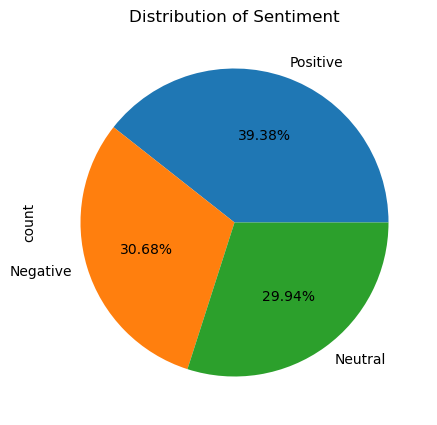

In [21]:
plt.figure(figsize=(5,5))
df['SentimentLabel'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("Distribution of Sentiment")
plt.show()

### Most Used Platfrom

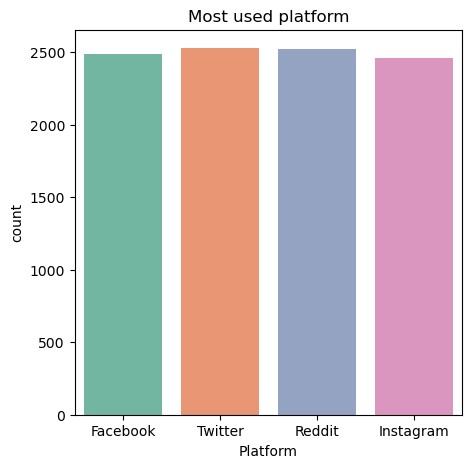

In [23]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x='Platform',palette='Set2')
plt.title("Most used platform")
plt.show()

### Finding Corelation 

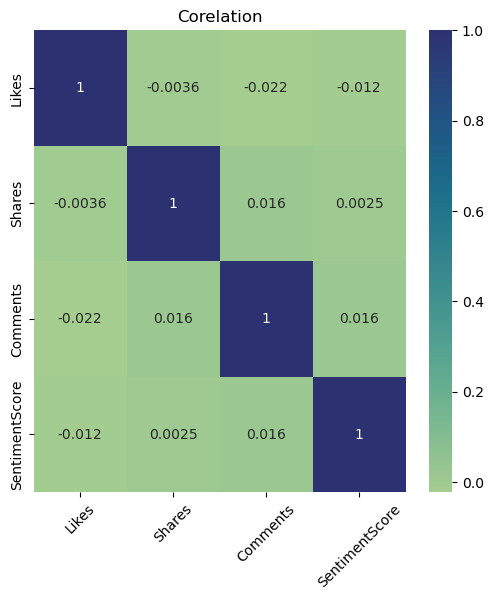

In [25]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='crest')
plt.title("Corelation")
plt.xticks(rotation=45)
plt.show()

### Sentiment Based on Platfrom

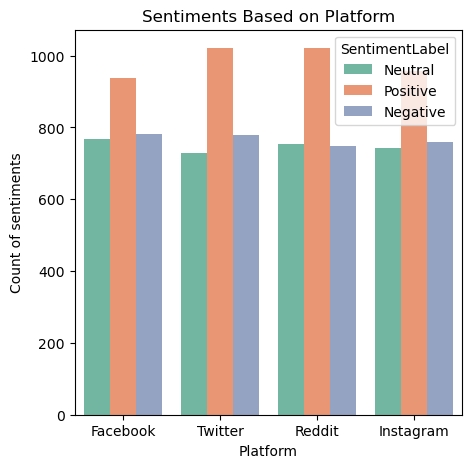

In [27]:
plt.figure(figsize=(5,5))
sns.countplot(data=df,x='Platform',palette='Set2',hue='SentimentLabel')
plt.title("Sentiments Based on Platform")
plt.ylabel("Count of sentiments")
plt.show()

### Count of Language

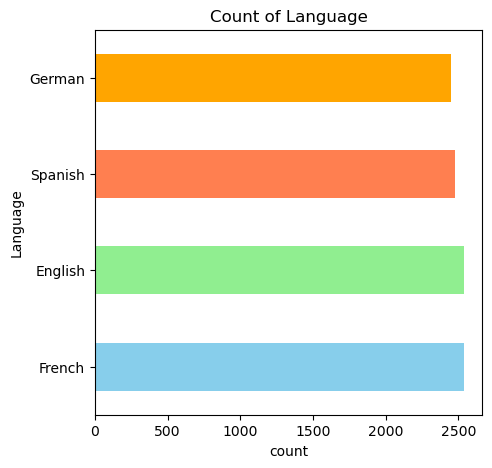

In [29]:
plt.figure(figsize=(5,5))
df['Language'].value_counts().plot(kind='barh',color=['skyblue', 'lightgreen', 'coral', 'orange'])
plt.title("Count of Language")
plt.xlabel("count")
plt.ylabel('Language')
plt.show()

### Checking for Outliers

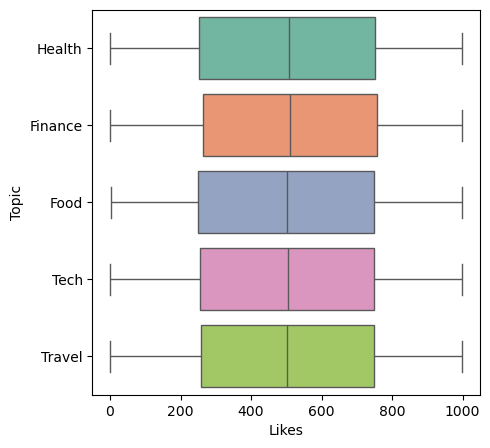

In [31]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df,x='Likes',y='Topic',palette='Set2')
plt.show()